# **1. Perkenalan Dataset : Bank Transaction Dataset**


Sumber : https://www.kaggle.com/datasets/valakhorasani/bank-transaction-dataset-for-fraud-detection/data

Dataset tersebut adalah data transaksi bank/keuangan di AS dimana:
* Berisi 2512 baris/transaksi
* Terdapat 16 fitur (5 fitur numerik dan 11 fitur kategorik)

Berikut penjelasan fitur-fitur pada dataset tersebut:

* **TransactionID**: ID transaksi
* **AccountID**: ID akun pengguna
* **TransactionAmount**: Nominal transaksi dalam dollar
* **TransactionDate**: Tanggal pengguna melakukan transaksi
* **TransactionType**: Jenis transaksi (Debit, Credit)
* **Location**: Lokasi transaksi, mengacu pada kota di AS
* **DeviceID**: ID perangkat
* **IP Address**: Alamat IPv4
* **MerchantID**: ID merchant
* **AccountBalance**: Sisa saldo pada akun pengguna
* **PreviousTransactionDate**: Tanggal transaksi sebelumnya
* **Channel**: Platform transaksi (Online, ATM, Branch)
* **CustomerAge**: Umur pengguna
* **CustomerOccupation**: Status pekerjaan pengguna (Doctor, Engineer, Student, Retired)
* **TransactionDuration**: Durasi transaksi dalam satuan detik
* **LoginAttempts**: Jumlah pencobaan login sebelum transaksi



# **2. Import Library**

In [ ]:
# Import library untuk visualisasi data dan manipulasi data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import library untuk Clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import silhouette_score
from sklearn.feature_selection import VarianceThreshold

# **3. Memuat Dataset**

In [ ]:
# Membaca dataset CSV menggunakan library pandas
df = pd.read_csv('bank_transactions_data_2.csv')

# **4. Exploratory Data Analysis (EDA)**

In [ ]:
# Mencari jumlah baris dan kolom dataset
print(f"Dataset berisi {df.shape[0]} baris dan {df.shape[1]} kolom")

# Menampilkan 5 baris pertama data
df.head()

Dataset berisi 2512 baris dan 16 kolom


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


In [ ]:
# Menampilkan informasi ringkas dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

In [ ]:
# Cek missing value data
df.isna().sum()

,0
TransactionID,0
AccountID,0
TransactionAmount,0
TransactionDate,0
TransactionType,0
Location,0
DeviceID,0
IP Address,0
MerchantID,0
Channel,0


In [ ]:
# Cek duplikasi data
print(f"Jumlah duplikat pada data : {df.duplicated().sum()}")

Jumlah duplikat pada data : 0


Dataset yang digunakan **tidak ada missing value** dan **tidak ada duplikasi data**

In [ ]:
# Statistika deskriptif variabel/fitur numerik
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966
std,291.946243,17.792198,69.963757,0.602662,3900.942499
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


Insight melalui statistika deskriptif:

1. **TransactionAmount**:
  * Rata-rata: **\$297.59**
  * Nominal transaksi berkisar dari **\$0.26** hingga **\$1919.11**
2. **CustomerAge**:
  * Rata-rata: **44 tahun**
  * Paling muda **18 tahun** dan paling tua **80 tahun**
3. **TransactionDuration**:
  * Rata-rata: **119 detik**. Transaksi paling cepat **10 detik** dan paling lama **300 detik**
  * 50% pengguna mempunyai durasi transaksi selama **112 detik**
4. **LoginAttempts**:
  * 75% pengguna melakukan percobaan login hanya **1 kali**
  * Percobaan login paling banyak sebanyak **5 kali**
5. **AccountBalance**:
  * Rata-rata: **\$5114.3**
  * Sisa saldo berkisar dari **\$101.25** hingga **\$14977.99**

**Tidak ada nilai invalid** yang ditemukan

# Bagaimana distribusi nominal transaksi pengguna? (TransactionAmount)

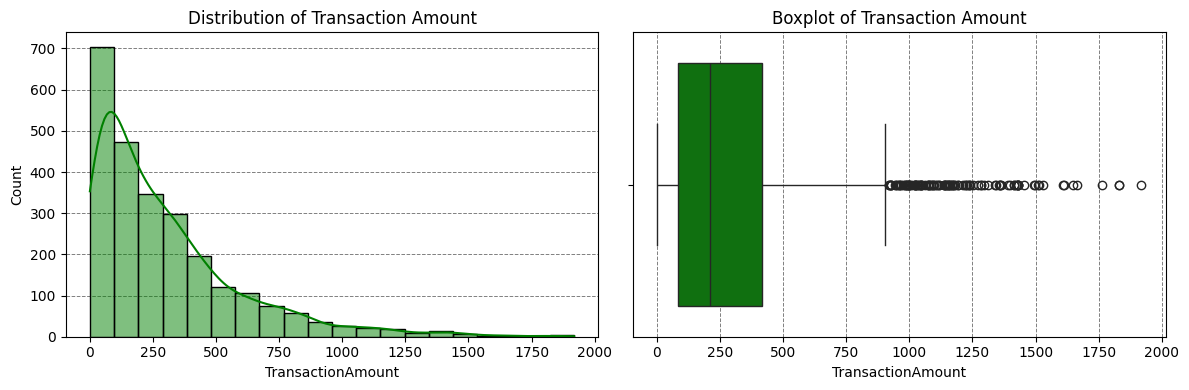

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Histogram TransactionAmount
sns.histplot(df['TransactionAmount'], bins=20, kde=True, color='green', ax=axes[0])
axes[0].set_title('Distribution of Transaction Amount')
axes[0].set_axisbelow(True)
axes[0].grid(axis='y', color='gray', linestyle='--', linewidth=0.7)

# Boxplot TransactionAmount
sns.boxplot(x=df['TransactionAmount'], color='green', ax=axes[1])
axes[1].set_title('Boxplot of Transaction Amount')
axes[1].set_axisbelow(True)
axes[1].grid(axis='x', color='gray', linestyle='--', linewidth=0.7)

plt.tight_layout()
plt.show()

* Histogram tersebut menunjukkan distribusi right-skewed akibat banyaknya transaksi dengan nominal kecil. Fitur ini akan distandardisasi saat pre-processing
* Boxplot tersebut menunjukkan adanya outlier. Namun informasi outlier ini akan disimpan dan digunakan untuk Fraud Detection

# Bagaimana distribusi durasi transaksi pengguna? (TransactionDuration)

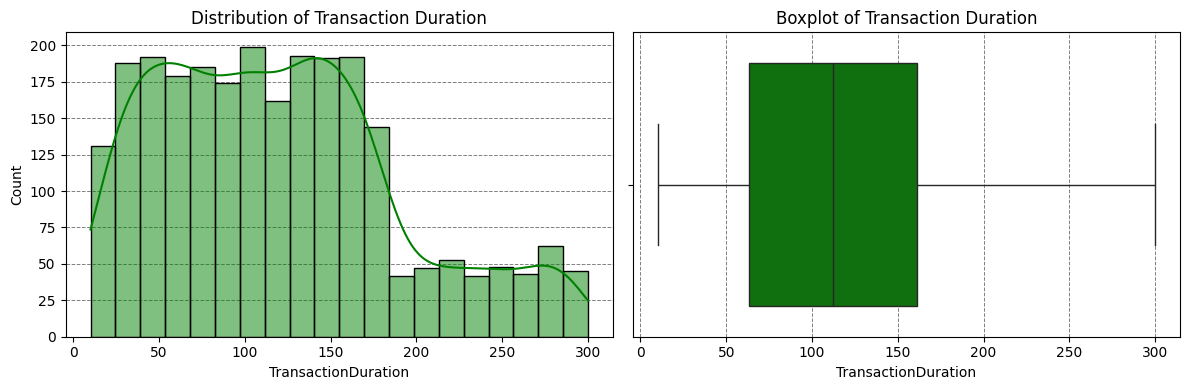

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Histogram TransactionDuration
sns.histplot(df['TransactionDuration'], bins=20, kde=True, color='green', ax=axes[0])
axes[0].set_title('Distribution of Transaction Duration')
axes[0].set_axisbelow(True)
axes[0].grid(axis='y', color='gray', linestyle='--', linewidth=0.7)

# Boxplot TransactionDuration
sns.boxplot(x=df['TransactionDuration'], color='green', ax=axes[1])
axes[1].set_title('Boxplot of Transaction Duration')
axes[1].set_axisbelow(True)
axes[1].grid(axis='x', color='gray', linestyle='--', linewidth=0.7)

plt.tight_layout()
plt.show()

* Histogram tersebut menunjukkan distribusi yang agak simetris
* Boxplot tersebut tidak menunjukkan adanya outlier

# Bagaimana distribusi umur pengguna? (CustomerAge)

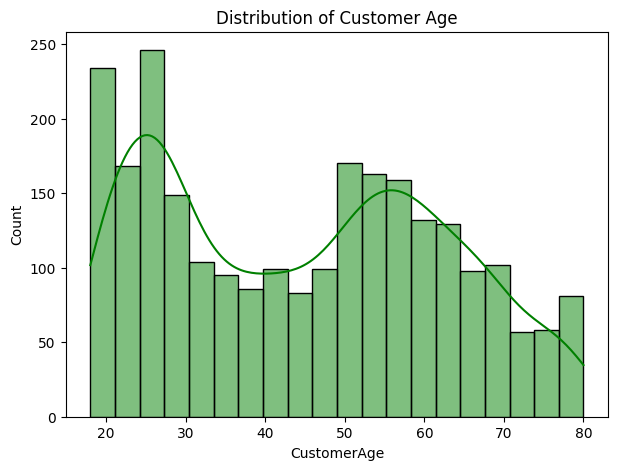

In [ ]:
# Histogram Umur Pengguna (CustomerAge)
plt.figure(figsize=(7,5))
sns.histplot(x=df['CustomerAge'], bins=20, kde=True, color='green')
plt.title('Distribution of Customer Age')
plt.show()

Histogram tersebut menunjukkan distribusi yang agak simetris

# Bagaimana distribusi jumlah percobaan login? (LoginAttempts)

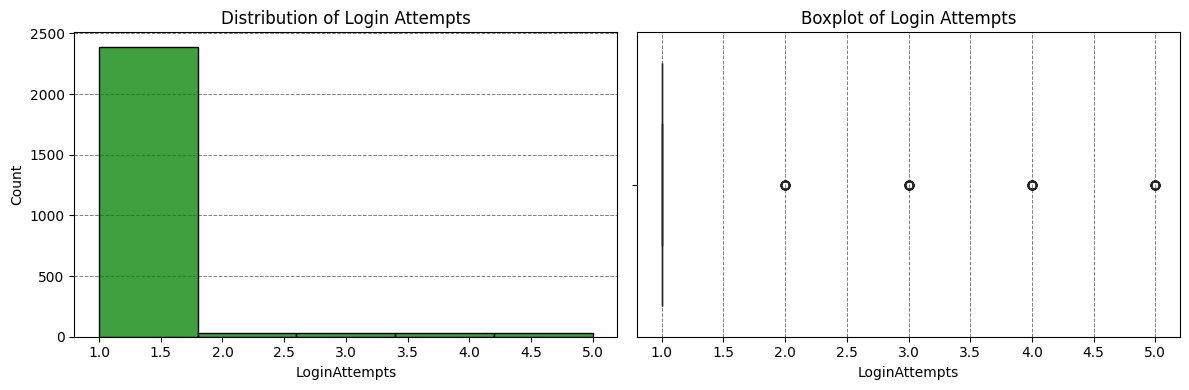

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Histogram Jumlah Percobaan Login (LoginAttempts)
sns.histplot(df['LoginAttempts'], bins=5, kde=False, color='green', ax=axes[0])
axes[0].set_title('Distribution of Login Attempts')
axes[0].set_axisbelow(True)
axes[0].grid(axis='y', color='gray', linestyle='--', linewidth=0.7)

# Boxplot Jumlah Percobaan Login (LoginAttempts)
sns.boxplot(x=df['LoginAttempts'], color='green', ax=axes[1])
axes[1].set_title('Boxplot of Login Attempts')
axes[1].set_axisbelow(True)
axes[1].grid(axis='x', color='gray', linestyle='--', linewidth=0.7)

plt.tight_layout()
plt.show()

* Histogram tersebut menunjukkan bahwa mayoritas percobaan login hanya 1 kali
* Melalui boxplot, percobaan login > 1 kali teridentifikasi sebagai outlier

# Bagaimana distribusi sisa saldo akun pengguna? (AccountBalance)

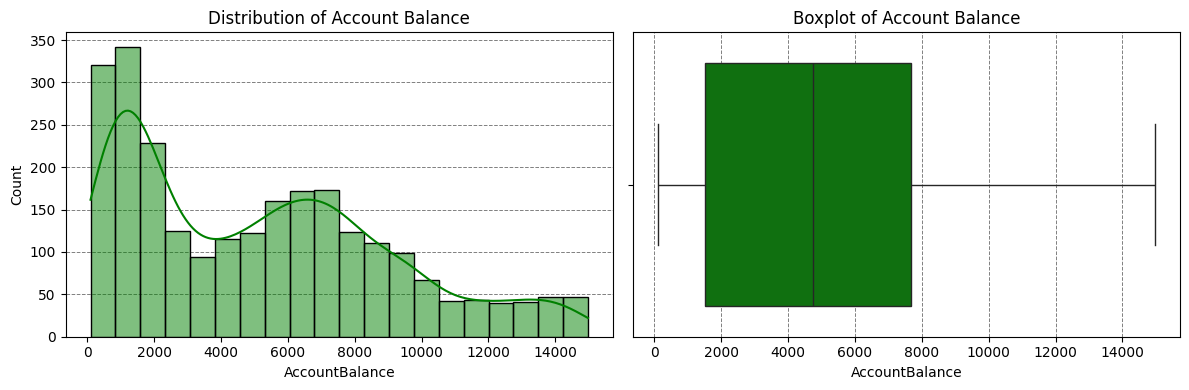

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Histogram Sisa Saldo Akun Pengguna (AccountBalance)
sns.histplot(df['AccountBalance'], bins=20, kde=True, color='green', ax=axes[0])
axes[0].set_title('Distribution of Account Balance')
axes[0].set_axisbelow(True)
axes[0].grid(axis='y', color='gray', linestyle='--', linewidth=0.7)

# Boxplot Sisa Saldo Akun Pengguna (AccountBalance)
sns.boxplot(x=df['AccountBalance'], color='green', ax=axes[1])
axes[1].set_title('Boxplot of Account Balance')
axes[1].set_axisbelow(True)
axes[1].grid(axis='x', color='gray', linestyle='--', linewidth=0.7)

plt.tight_layout()
plt.show()

* Histogram tersebut menunjukkan distribusi cenderung right-skewed. Fitur ini akan distandardisasi saat pre-processing
* Boxplot tersebut menunjukkan tidak adanya outlier

# Bagaimana korelasi antar variabel?

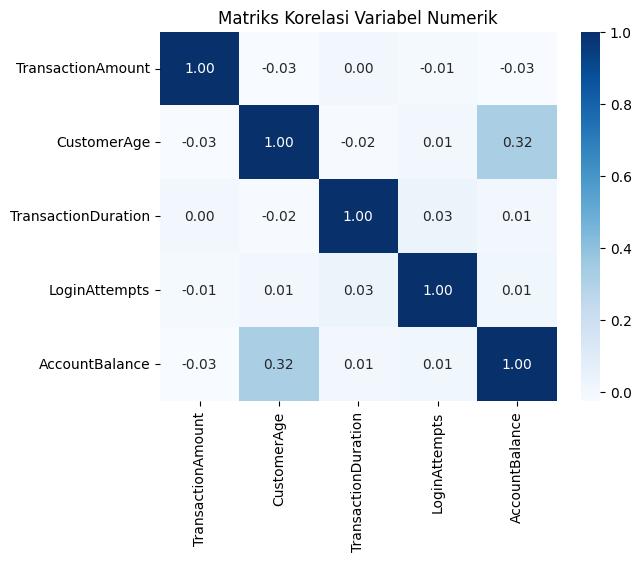

In [ ]:
# Buat list variabel/fitur tipe data numerik
numerical_columns = df.select_dtypes(include=['int64','float64']).columns.tolist()

# Melihat hubungan antar variabel melalui Matriks Korelasi
correlation_matrix = df[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="Blues", fmt=".2f")
plt.title('Matriks Korelasi Variabel Numerik')
plt.show()

* Adanya korelasi positif antara CustomerAge dan AccountBalance
* Namun secara keseluruhan korelasi antar variabel numerik sangat lemah, sehingga adanya indikasi bahwa variabel-variabelnya relatif independen

# Bagaimana persentase pengguna Debit vs Credit? (TransactionType)

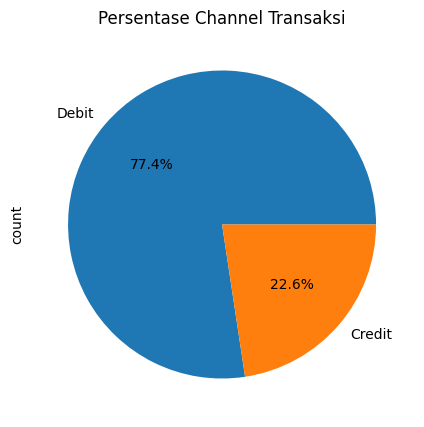

In [ ]:
# Piechart Tipe Transaksi (Debit/Credit)
plt.figure(figsize=(7, 5))
df['TransactionType'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Persentase Channel Transaksi')
plt.show()

Mayoritas pengguna menggunakan Debit untuk transaksi (77.4%) daripada Credit (22.6%)

# Bagaimana distribusi channel transaksi? (TransactionChannel)

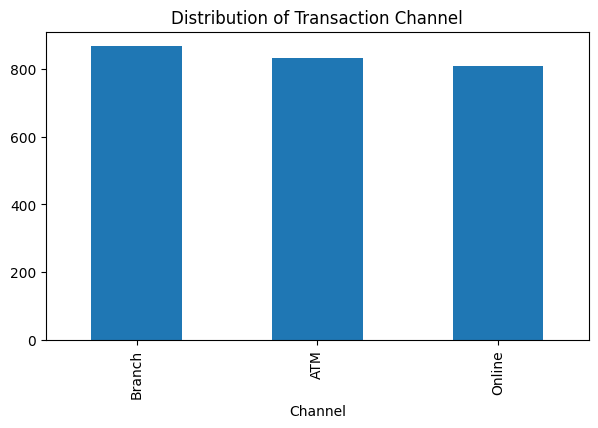

In [ ]:
# Diagram Batang Platform Transaksi Pengguna
plt.figure(figsize=(7, 4))
df['Channel'].value_counts().plot(kind='bar')
plt.title('Distribution of Transaction Channel')
plt.show()

Diagram batang tersebut menunjukkan distribusi Channel yang relatif merata antara Branch, ATM, dan Online.

# Bagaimana distribusi status pekerjaan pengguna? (CustomerOccupation)

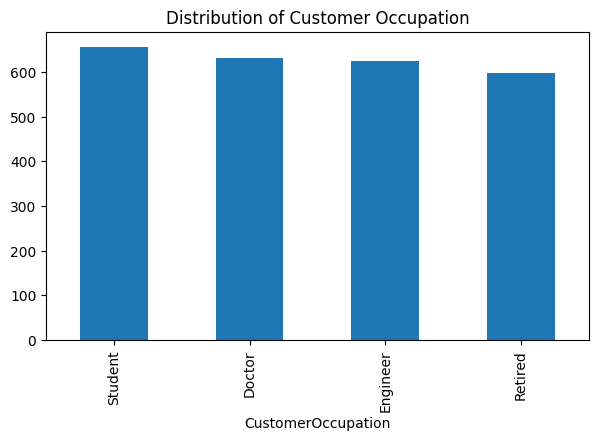

In [ ]:
# Diagram Batang Status Pekerjaan Pengguna
plt.figure(figsize=(7, 4))
df['CustomerOccupation'].value_counts().plot(kind='bar')
plt.title('Distribution of Customer Occupation')
plt.show()

Diagram batang tersebut menunjukkan distribusi status pekerjaan yang relatif merata antara Student, Doctor, Engineer, dan Retired.

# **5. Data Preprocessing**

1. Standardisasi (untuk 'TransactionAmount' dan 'AccountBalance')

In [ ]:
scaler = StandardScaler()
df[['TransactionAmount_Scaled', 'AccountBalance_Scaled']] = scaler.fit_transform(
    df[['TransactionAmount', 'AccountBalance']])

2. Label Encoding (untuk 'TransactionType')

In [ ]:
label_encoder = LabelEncoder()
df['TransactionType'] = label_encoder.fit_transform(df['TransactionType'])

3. Menambahkan fitur baru yang mendukung analisa Fraud Detection

In [ ]:
df['TransactionFrequency'] = df.groupby('AccountID')['TransactionID'].transform('count')

In [ ]:
# Dataset setelah pre-processing
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TransactionAmount_Scaled,AccountBalance_Scaled,TransactionFrequency
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,1,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08,-0.971275,-0.000537,7
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,1,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35,0.269440,2.216472,7
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,1,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04,-0.586882,-1.023534,4
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,1,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06,-0.387456,0.885797,8
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,0,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39,-0.973468,0.593589,6


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering : KMeans**

In [ ]:
# Pemilihan fitur untuk clustering
X = df[['TransactionAmount_Scaled', 'AccountBalance_Scaled', 'TransactionDuration',
        'LoginAttempts', 'TransactionFrequency']]

In [ ]:
# Clustering menggunakan KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X)
df['Cluster_KMeans'] = kmeans_labels

# Menghitung jarak dari tiap titik ke cluster centroid
df['Distance'] = np.linalg.norm(X - kmeans.cluster_centers_[kmeans_labels], axis=1)

# Definisi threshold dari jarak untuk mendeteksi potential fraud
threshold = df['Distance'].quantile(0.98)
potential_fraud = df[df['Distance'] > threshold]

print(f"Jumlah transaksi yang berpotensi fraud adalah: {len(potential_fraud)}")

Jumlah transaksi yang berpotensi fraud adalah: 51


In [ ]:
# Menambahkan fitur Fraud/Tidak
distances = np.linalg.norm(X - kmeans.cluster_centers_[kmeans_labels], axis=1)
cluster_sizes = np.bincount(kmeans_labels)
large_clusters = [i for i, size in enumerate(cluster_sizes) if size >= 20]
df['Potential_Fraud'] = np.isin(df['Cluster_KMeans'], large_clusters) & (distances > threshold)
df['KMeans_Fraud'] = np.where(df['Potential_Fraud'], 'Fraud', 'Not Fraud')

## **b. Evaluasi Model Clustering**

### 1. **Elbow Method**

In [ ]:
inertia = []
silhouette_scores = []
cluster_range = range(2, 10)

for n in cluster_range:
    kmeans_test = KMeans(n_clusters=n, random_state=42)
    kmeans_test.fit(X)
    inertia.append(kmeans_test.inertia_)
    silhouette_scores.append(silhouette_score(X, kmeans_test.labels_))

<ipython-input-26-ef7435ed6d6b>:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


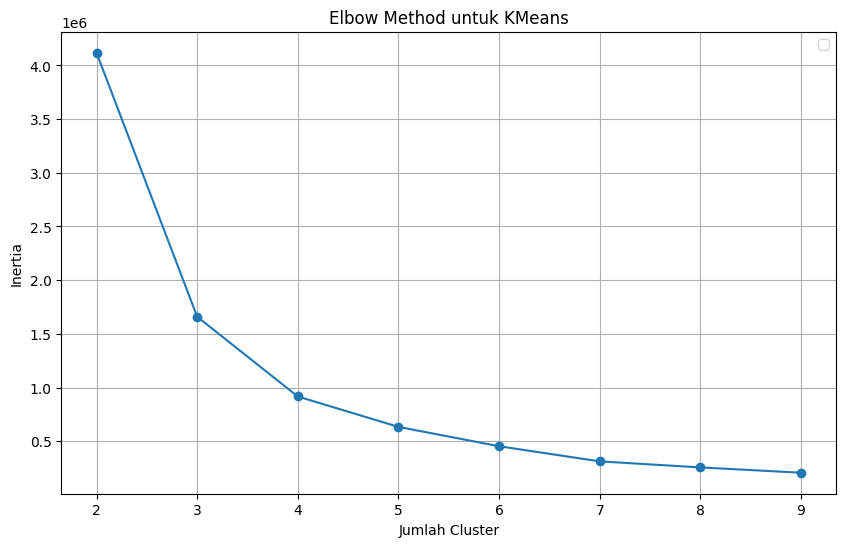

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia, marker='o', )
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inertia')
plt.title('Elbow Method untuk KMeans')
plt.grid()
plt.legend()
plt.show()

Melalui grafik Elbow Method, dapat terlihat bahwa cluster **n=3** merupakan **jumlah cluster yang optimal**

### 2. **Silhouette Score**

<ipython-input-27-2a617cfccdec>:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


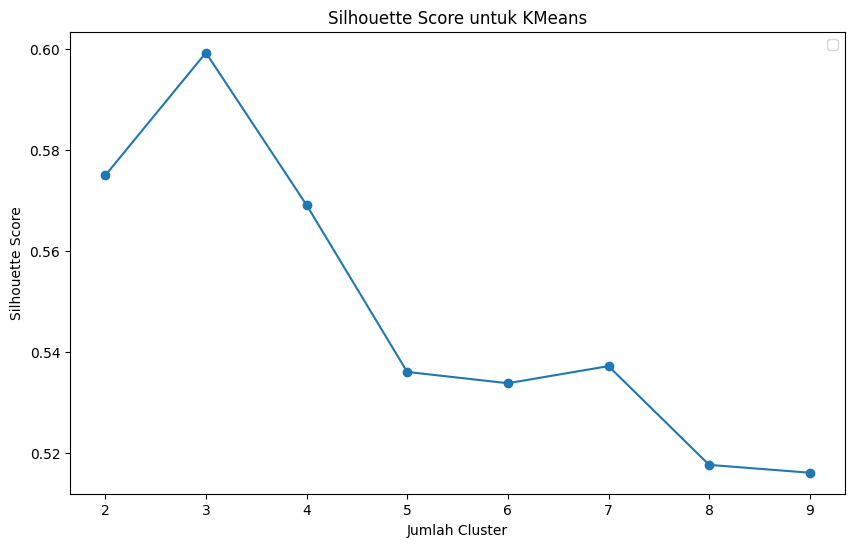

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score untuk KMeans')
plt.legend()
plt.show()

In [ ]:
silhouette_kmeans = silhouette_score(X, kmeans.labels_)
print(f"Hasil Silhoette Score: {silhouette_kmeans:.4f}")

Hasil Silhoette Score: 0.5992


Melalui grafik Silhouette Score, score **paling optimal** ada di jumlah cluster **n=3**

Hasil dari Silhouette Score model clustering ini adalah **0.5992**

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

## **d. Visualisasi Hasil Clustering**

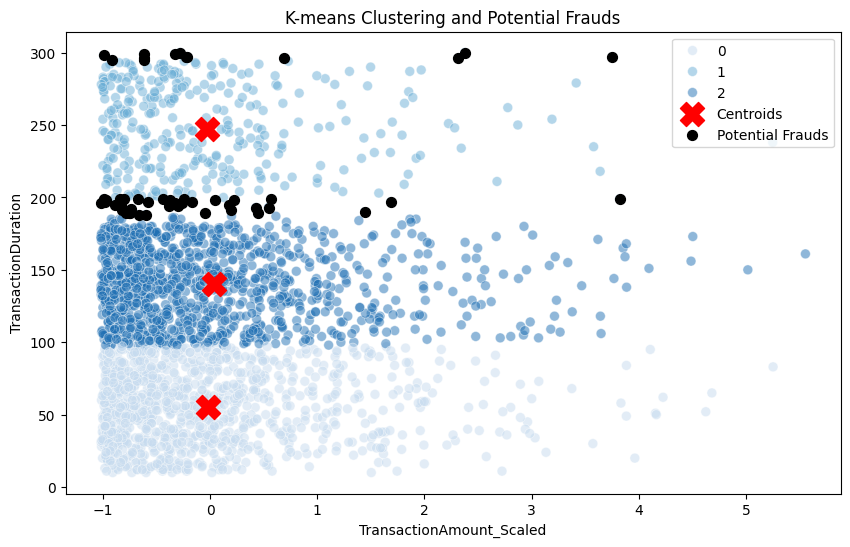

In [ ]:
n_clusters = len(np.unique(kmeans_labels))
cluster_colors = sns.color_palette("Blues", n_colors=n_clusters)

plt.figure(figsize=(10,6))
sns.scatterplot(x='TransactionAmount_Scaled',
                y='TransactionDuration',
                hue='Cluster_KMeans',
                data=df,
                palette=cluster_colors,
                s=50,
                alpha=0.5)

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 2],
            s=300,
            c='red',
            marker='X',
            label='Centroids')

plt.scatter(x='TransactionAmount_Scaled',
            y='TransactionDuration',
            data=potential_fraud,
            c='black',
            s=50,
            label='Potential Frauds')

plt.title('K-means Clustering and Potential Frauds')
#plt.xlabel(X[0])
#plt.ylabel(X[1])
plt.legend(loc='upper right')
#plt.grid(True, linestyle='--')
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [ ]:
df['TransactionAmount'] = scaler.inverse_transform(df[['TransactionAmount_Scaled', 'AccountBalance_Scaled']])[:, 0]
df['AccountBalance'] = scaler.inverse_transform(df[['TransactionAmount_Scaled', 'AccountBalance_Scaled']])[:, 1]

df['TransactionType'] = label_encoder.inverse_transform(df['TransactionType'])

In [ ]:
# Agregasi pada fitur yang sudah diinversi
cluster_summary = df.groupby('Cluster_KMeans').agg({
    'TransactionAmount': ['mean', 'min', 'max'],
    'AccountBalance': ['mean', 'min', 'max'],
    'TransactionDuration' : ['mean', 'min', 'max'],
    'LoginAttempts' : lambda x: x.mode()[0],
    'TransactionFrequency' : lambda x: x.mode()[0]
})

cluster_summary

TransactionAmount                AccountBalance          \
                            mean   min      max           mean     min   
Cluster_KMeans                                                           
0                     290.685904  0.84  1831.02    5042.318959  101.25   
1                     288.992521  1.21  1830.00    5097.235798  135.96   
2                     307.040291  0.26  1919.11    5189.148206  106.86   

                         TransactionDuration           LoginAttempts  \
                     max                mean  min  max      <lambda>   
Cluster_KMeans                                                         
0               14977.99           55.141911   10   97             1   
1               14928.35          246.899160  194  300             1   
2               14942.78          140.360656   98  193             1   

               TransactionFrequency  
                           <lambda>  
Cluster_KMeans                       
0                                 5  
1                                 6  
2                                 5

In [ ]:
fraud_summary = df.groupby('KMeans_Fraud').agg({
    'TransactionAmount': ['mean', 'min', 'max'],
    'AccountBalance': ['mean', 'min', 'max'],
    'TransactionDuration' : ['mean', 'min', 'max'],
    'LoginAttempts' : lambda x: x.mode()[0],
    'TransactionFrequency' : lambda x: x.mode()[0]
})

fraud_summary

TransactionAmount                AccountBalance          \
                          mean   min      max           mean     min   
KMeans_Fraud                                                           
Fraud               278.782941  1.21  1413.24    5327.584118  135.96   
Not Fraud           297.983600  0.26  1919.11    5109.883080  101.25   

                       TransactionDuration           LoginAttempts  \
                   max                mean  min  max      <lambda>   
KMeans_Fraud                                                         
Fraud         14765.41          220.921569  188  300             1   
Not Fraud     14977.99          117.544494   10  294             1   

             TransactionFrequency  
                         <lambda>  
KMeans_Fraud                       
Fraud                           6  
Not Fraud                       5

## Cluster 1:
  * **Rata-rata TransactionAmount**: 290.68
  * **Rata-rata AccountBalance**: 5042.32
  * **Rata-rata TransactionDuration**: 55.14
  * **LoginAttempts (Modus)** : 1
  * **TransactionFrequency (Modus)**: 5
  * **Analisis**: Cluster ini mencakup transaksi dengan rata-rata nominal cukup tinggi dan rata-rata sisa saldo yang paling rendah. Pengguna pada cluster ini memiliki durasi transaksi yang sangat singkat dengan jumlah transaksi paling sering sebanyak 5 kali.

## Cluster 2:
* **Rata-rata TransactionAmount**: 288.99
* **Rata-rata AccountBalance**: 5097.23
* **Rata-rata TransactionDuration**: 246.89
* **LoginAttempts (Modus)** : 1
* **TransactionFrequency (Modus)**: 6
* **Analisis**: Cluster ini mencakup transaksi dengan rata-rata nominal rendah dan rata-rata sisa saldo yang cukup tinggi. Pengguna pada cluster ini memiliki durasi transaksi yang sangat lama dibanding cluster yang lain dan memiliki jumlah transaksi paling sering sebanyak 6 kali.

## Cluster 3:
* **Rata-rata TransactionAmount**: 307.04
* **Rata-rata AccountBalance**: 5189.15
* **Rata-rata TransactionDuration**: 140.36
* **LoginAttempts (Modus)** : 1
* **TransactionFrequency (Modus)**: 5
* **Analisis**: Cluster ini mencakup transaksi dengan rata-rata nominal tertinggi dan rata-rata sisa saldo lebih tinggi dari cluster 1 dan 2. Pengguna pada cluster ini memiliki durasi transaksi yang cukup lama dan memiliki jumlah transaksi paling sering sebanyak 5 kali.

## Fraud:
* **Rata-rata TransactionAmount**: 278.78
* **Rata-rata AccountBalance**: 5327.58
* **Rata-rata TransactionDuration**: 220.92
* **LoginAttempts (Modus)** : 1
* **TransactionFrequency (Modus)**: 6
* **Analisis**: Cluster fraud mempunyai transaksi dengan rata-rata nominal paling rendah dan rata-rata sisa saldo paling tinggi. Pengguna pada cluster ini memiliki durasi transaksi yang lama dan memiliki jumlah transaksi paling sering sebanyak 6 kali.


## Wawasan yang dapat diambil berdasarkan interpretasi Cluster

- Rata-rata TransactionAmount, AccountBalanced tidak terlalu berbeda secara signifikan, sehingga diperlukan data yang mempunyai distribusi TransactionAmount dan AccountBalance yang lebih luas
- Anomali yang terdeteksi (Fraud) memiliki deskripsi fitur yang tidak berbeda signifikan dengan Cluster. Ini bisa sangat mungkin terjadi dikarenakan adanya kemiripan perilaku Fraud dan Bukan Fraud, sehingga perlu adanya variabel tambahan yang lebih relevan dengan perilaku Fraud agar dapat dilihat pola yang signifikan

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [ ]:
df.to_csv('hasil_clustering.csv', index=False)